In [49]:
obs= read.csv('merged_obs_Tcell_sigscore_5_cohorts.csv',header=T)

In [50]:
unique(obs$celltype)

[1] "C3-CD4-CXCR6"      "C11-CD8-LAYN"      "C8-CD8-GZMK"      
 [4] "C15-CD4/CD8-ISG15" "C6-CD4-RORC"       "C10-CD8-ZNF683"   
 [7] "C1-CD4-CCR7"       "C9-CD8-CX3CR1"     "C4-CD4-CXCL13"    
[10] "C2-CD4-HSPA1A"     "C12-CD8-TRDV1"     "C13-NK-FCGR3A"    
[13] "C5-CD4-FOXP3"      "C7-CD8-SLC4A10"    "C14-NK-XCL1"      
[16] "C16-CD4/CD8-MKI67" "CD4T"              "CD8T"             
[19] "NK"                "cycling"           "Bcell"            
[22] "Epithelial"        "Fibroblasts"       "Myeloid"          
[25] "Endothelial"       "Mast"              "Plasma"           
[28] "CD8-CXCL13"        "CD8-GZMK"          "CD4-FOXP3"        
[31] "CD8-GZMH"          "CD8-STMN1"         "CD8-ZNF683"       
[34] "CD4-CCR7"          "CD4-CXCL13"        "CD4-ANXA1"        
[37] "CD4-PRF1"          "TNK_others"        "CD8-ISG15"        
[40] "CD8-FTH1"          "CD8-CD52"          "CD8-FOS"

In [51]:
obs = subset(obs, celltype %in% c('C3-CD4-CXCR6','C11-CD8-LAYN','C8-CD8-GZMK','C15-CD4/CD8-ISG15',
                                  'C6-CD4-RORC','C10-CD8-ZNF683','C1-CD4-CCR7','C9-CD8-CX3CR1',
                                  'C4-CD4-CXCL13','C2-CD4-HSPA1A','C12-CD8-TRDV1','C13-NK-FCGR3A',
                                  'C5-CD4-FOXP3','C7-CD8-SLC4A10','C14-NK-XCL1','C16-CD4/CD8-MKI67',
                                  'CD4T','CD8T','CD8-CXCL13','CD8-GZMK','CD4-FOXP3','CD8-GZMH',
                                  'CD8-STMN1','CD8-ZNF683','CD4-CCR7','CD4-CXCL13','CD4-ANXA1','CD4-PRF1',
                                  'CD8-ISG15','CD8-FTH1','CD8-CD52','CD8-FOS'))


In [52]:
head(obs,n=2)

,X,celltype,cytotoxic_score,exhausted_score,age,Sample,study
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,AAACCTGAGATATGCA_LUNG_T25,C3-CD4-CXCR6,-0.3608342,-0.2154291,69,LUNG_T25,nsclc_inhouse_kim_etal
2,AAACCTGAGGATCGCA_LUNG_T28,C11-CD8-LAYN,1.5525668,0.3933895,73,LUNG_T28,nsclc_inhouse_kim_etal


In [53]:
summary(obs$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   61.00   68.00   66.49   74.00   91.00 

In [54]:
obs$age_bin4<- cut(obs$age,  breaks = c(min(obs$age),40,60,80,max(obs$age)),
                                     labels = c("<40","40-60","60-80",">80"), include.lowest = TRUE)
obs$age_bin3<- cut(obs$age,  breaks = c(min(obs$age),40,60,max(obs$age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)
obs$age_bin5<- cut(obs$age,  breaks = c(min(obs$age),40,50,60,70,80,max(obs$age)),
                                     labels = c("<40","40-50",'50-60',"60-70",'70-80','>80'), include.lowest = TRUE)

obs$age_bin2=  ifelse(obs$age > 60, '>60','<=60')

In [55]:
head(obs,n=2)

,X,celltype,cytotoxic_score,exhausted_score,age,Sample,study,age_bin4,age_bin3,age_bin5,age_bin2
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>
1,AAACCTGAGATATGCA_LUNG_T25,C3-CD4-CXCR6,-0.3608342,-0.2154291,69,LUNG_T25,nsclc_inhouse_kim_etal,60-80,>60,60-70,>60
2,AAACCTGAGGATCGCA_LUNG_T28,C11-CD8-LAYN,1.5525668,0.3933895,73,LUNG_T28,nsclc_inhouse_kim_etal,60-80,>60,70-80,>60


In [56]:
unique(obs$study)

[1] "nsclc_inhouse_kim_etal" "nsclc_leader_etal"      "CRC_GSE178341"         
[4] "HCC_GSE140228"          "GC_GSE183904"

In [57]:
meta= obs[!duplicated(obs$Sample),]
table(meta$study, meta$age_bin5)

                        
                         <40 40-50 50-60 60-70 70-80 >80
  CRC_GSE178341            3     8    16    11    15   9
  GC_GSE183904             1     0     3    10     6   6
  HCC_GSE140228            1     2     3     3     0   1
  nsclc_inhouse_kim_etal   5     0     8     5     1   0
  nsclc_leader_etal        0     0     3    17    27   5

In [115]:
library(ggpubr)
library(khroma)
library(ggpubr)
themeDivClust2 <-
  list(
    geom_boxplot(color = 'black',  width = 0.3, size = 0.3, fill = NA,outlier.shape = NA),
    geom_violin(color = 'black', scale = 'width',  linewidth = 0.5,trim = TRUE,alpha = 0.8),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 2, lwd = 0.05),
    #stat_compare_means(aes(group = response_bin),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1),
    #geom_violin(color = "black", draw_quantiles = 0.5, lwd = 0.5),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 1, lwd = 0.05),
    xlab(""),
    #scale_fill_muted(),
    #scale_color_muted(), 
    
    #scale_fill_manual(values = c("#E69F00","#56B4E9")),
    scale_fill_manual(values = rev(c("#E69F00","#56B4E9","#009E73",'#EEDD88'))),
    theme_minimal(),
    theme(legend.position = "none",
          #legend.justification = c(0,1),
          #legend.title = element_blank(),
          legend.text = element_text(size=8),
          legend.title = element_text(size=8),
          aspect.ratio = 1.2,
          #plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
          axis.title.y = element_text(size=8,colour="black"),
          axis.title.x = element_text(size=8,colour="black"),
          #axis.title.x = element_blank(),
          axis.text = element_text(size=8,colour="black",angle=0),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
          #axis.text.x = element_blank(),
          plot.title = element_text(size=8,face="bold",hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          axis.line = element_line(colour = "black"),
          axis.ticks.length=unit(.1, "cm"),
          axis.ticks = element_line(colour = "black", size = 0.5)
    )
  )
###-----
### for nsclc 1
###-----
gg1_nsclc1= obs  %>% filter(study== 'nsclc_inhouse_kim_etal') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,max(age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_inhouse+kim')
  
#
gg2_nsclc1= obs  %>% filter(study== 'nsclc_inhouse_kim_etal') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,max(age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_inhouse+kim')
#
pdf('boxplot_pan_signature_kiminhouse.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()
###-----
### for nsclc_leader_etal
###-----
gg1_nsclc2= obs  %>% filter(study== 'nsclc_leader_etal') %>%
mutate(age_group= cut(age,  breaks = c(min(age),60,80,max(age)),
                                     labels = c("<60","60-80",">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_Leader et al')
#
gg2_nsclc2= obs  %>% filter(study== 'nsclc_leader_etal') %>%
mutate(age_group= cut(age,  breaks = c(min(age),60,80,max(age)),
                                     labels = c("<40","60-80",">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_Leader et al')
#
pdf('boxplot_pan_signature_nsclc_leader_etal.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc2,gg2_nsclc2, ncol=2)
dev.off()
###-----
### for CRC
###-----
gg1_crc= obs  %>% filter(study== 'CRC_GSE178341') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('CRC_GSE178341')
#
gg2_crc= obs  %>% filter(study== 'CRC_GSE178341') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('CRC_GSE178341')
#
pdf('boxplot_pan_signature_CRC_GSE178341.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_crc,gg2_crc, ncol=2)
dev.off()
###-----
### for GC
###-----
gg1_gc= obs  %>% filter(study== 'GC_GSE183904') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('GC_GSE183904')
#
gg2_gc= obs  %>% filter(study== 'GC_GSE183904') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('GC_GSE183904')
#
pdf('boxplot_pan_signature_GC_GSE183904.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_gc,gg2_gc, ncol=2)
dev.off()

###-----
### for HCC
###-----
gg1_hcc= obs  %>% filter(study== 'HCC_GSE140228') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('HCC_GSE140228')
#
gg2_hcc= obs  %>% filter(study== 'HCC_GSE140228') %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('HCC_GSE140228')
#
pdf('boxplot_pan_signature_HCC_GSE140228.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_gc,gg2_gc, ncol=2)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [116]:
pdf('boxplot_pan_signature_merge.pdf',width = 8,height = 10)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, 
                   gg1_nsclc2, gg2_nsclc2, 
                   gg1_crc,gg2_crc,
                   gg1_gc,gg2_gc,
                   gg1_hcc, gg2_hcc,ncol=2
                
                  )
dev.off()

png 
  2

In [118]:
table(obs$celltype,obs$study)

                   
                    CRC_GSE178341 GC_GSE183904 HCC_GSE140228
  C1-CD4-CCR7                   0            0             0
  C10-CD8-ZNF683                0            0             0
  C11-CD8-LAYN                  0            0             0
  C12-CD8-TRDV1                 0            0             0
  C13-NK-FCGR3A                 0            0             0
  C14-NK-XCL1                   0            0             0
  C15-CD4/CD8-ISG15             0            0             0
  C16-CD4/CD8-MKI67             0            0             0
  C2-CD4-HSPA1A                 0            0             0
  C3-CD4-CXCR6                  0            0             0
  C4-CD4-CXCL13                 0            0             0
  C5-CD4-FOXP3                  0            0             0
  C6-CD4-RORC                   0            0             0
  C7-CD8-SLC4A10                0            0             0
  C8-CD8-GZMK                   0            0             0
  C9

In [119]:
###
### only CD8 T cell
###

###-----
### for nsclc 1
###-----
tarid = 'kiminhouse_CD8_'

gg1_nsclc1= obs  %>% filter(study== 'nsclc_inhouse_kim_etal') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,max(age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_inhouse+kim')
  
#
gg2_nsclc1= obs  %>% filter(study== 'nsclc_inhouse_kim_etal') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,max(age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_inhouse+kim')
#
pdf(paste0(tarid,'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()
###-----
### for nsclc_leader_etal
###-----
tarid= 'nsclc_leader_etal_CD8_'

gg1_nsclc2= obs  %>% filter(study== 'nsclc_leader_etal') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),60,80,max(age)),
                                     labels = c("<60","60-80",">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_Leader et al')
#
gg2_nsclc2= obs  %>% filter(study== 'nsclc_leader_etal') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),60,80,max(age)),
                                     labels = c("<40","60-80",">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_Leader et al')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc2,gg2_nsclc2, ncol=2)
dev.off()
###-----
### for CRC
###-----
tarid= 'CRC_GSE178341_CD8_'
gg1_crc= obs  %>% filter(study== 'CRC_GSE178341') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('CRC_GSE178341')
#
gg2_crc= obs  %>% filter(study== 'CRC_GSE178341') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('CRC_GSE178341')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_crc,gg2_crc, ncol=2)
dev.off()
###-----
### for GC
###-----
tarid= 'GC_GSE183904_CD8_'
gg1_gc= obs  %>% filter(study== 'GC_GSE183904') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('GC_GSE183904')
#
gg2_gc= obs  %>% filter(study== 'GC_GSE183904') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('GC_GSE183904')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_gc,gg2_gc, ncol=2)
dev.off()

###-----
### for HCC
###-----
tarid = 'HCC_GSE140228_CD8_'

gg1_hcc= obs  %>% filter(study== 'HCC_GSE140228') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('HCC_GSE140228')
#
gg2_hcc= obs  %>% filter(study== 'HCC_GSE140228') %>% filter(grepl('CD8', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('HCC_GSE140228')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_gc,gg2_gc, ncol=2)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [120]:
pdf('CD8T_boxplot_pan_signature_merge.pdf',width = 8,height = 10)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, 
                   gg1_nsclc2, gg2_nsclc2, 
                   gg1_crc,gg2_crc,
                   gg1_gc,gg2_gc,
                   gg1_hcc, gg2_hcc,ncol=2
                
                  )
dev.off()

png 
  2

In [121]:
###
### only CD4 T cell
###

###-----
### for nsclc 1
###-----
tarid = 'kiminhouse_CD4_'

gg1_nsclc1= obs  %>% filter(study== 'nsclc_inhouse_kim_etal') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,max(age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_inhouse+kim')
  
#
gg2_nsclc1= obs  %>% filter(study== 'nsclc_inhouse_kim_etal') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,max(age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_inhouse+kim')
#
pdf(paste0(tarid,'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()
###-----
### for nsclc_leader_etal
###-----
tarid= 'nsclc_leader_etal_CD4_'

gg1_nsclc2= obs  %>% filter(study== 'nsclc_leader_etal') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),60,80,max(age)),
                                     labels = c("<60","60-80",">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_Leader et al')
#
gg2_nsclc2= obs  %>% filter(study== 'nsclc_leader_etal') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),60,80,max(age)),
                                     labels = c("<40","60-80",">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('NSCLC_Leader et al')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc2,gg2_nsclc2, ncol=2)
dev.off()
###-----
### for CRC
###-----
tarid= 'CRC_GSE178341_CD4_'
gg1_crc= obs  %>% filter(study== 'CRC_GSE178341') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('CRC_GSE178341')
#
gg2_crc= obs  %>% filter(study== 'CRC_GSE178341') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('CRC_GSE178341')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_crc,gg2_crc, ncol=2)
dev.off()
###-----
### for GC
###-----
tarid= 'GC_GSE183904_CD4_'
gg1_gc= obs  %>% filter(study== 'GC_GSE183904') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('GC_GSE183904')
#
gg2_gc= obs  %>% filter(study== 'GC_GSE183904') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('GC_GSE183904')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_gc,gg2_gc, ncol=2)
dev.off()

###-----
### for HCC
###-----
tarid = 'HCC_GSE140228_CD4_'

gg1_hcc= obs  %>% filter(study== 'HCC_GSE140228') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('HCC_GSE140228')
#
gg2_hcc= obs  %>% filter(study== 'HCC_GSE140228') %>% filter(grepl('CD4', celltype)) %>%
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('HCC_GSE140228')
#
pdf(paste0(tarid, 'boxplot_pan_signature.pdf'),width = 8,height = 5)
cowplot::plot_grid(gg1_gc,gg2_gc, ncol=2)
dev.off()
#
pdf('CD4T_boxplot_pan_signature_merge.pdf',width = 8,height = 10)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, 
                   gg1_nsclc2, gg2_nsclc2, 
                   gg1_crc,gg2_crc,
                   gg1_gc,gg2_gc,
                   gg1_hcc, gg2_hcc,ncol=2
                
                  )
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [161]:
library(tidyverse)
stat_samplelevel= obs %>% filter(grepl('CD', celltype)) %>%  
              select(c(cytotoxic_score,exhausted_score,Sample)) %>% 
              group_by(Sample) %>% 
              summarise_all(median) %>% left_join(meta[,-c(1:4)], by= 'Sample') %>%
mutate(age_group= cut(age,  breaks = c(min(age),61,80,max(age)),
                                     labels = c("<60",'60-80',">80"), include.lowest = TRUE))


In [162]:
head(stat_samplelevel)

Sample,cytotoxic_score,exhausted_score,age,study,age_bin4,age_bin2,age_bin3,age_bin5,age_group
<chr>,<dbl>,<dbl>,<int>,<chr>,<fct>,<chr>,<fct>,<fct>,<fct>
103,-0.159596667,-0.2864165,73,nsclc_leader_etal,60-80,>60,>60,70-80,60-80
107,-0.086908626,-0.3004352,73,nsclc_leader_etal,60-80,>60,>60,70-80,60-80
111,-0.132065395,-0.2942867,73,nsclc_leader_etal,60-80,>60,>60,70-80,60-80
116,-0.153818355,-0.3390188,73,nsclc_leader_etal,60-80,>60,>60,70-80,60-80
297,0.028700207,-0.2136616,66,nsclc_leader_etal,60-80,>60,>60,60-70,60-80
298,0.001139521,-0.1735778,66,nsclc_leader_etal,60-80,>60,>60,60-70,60-80


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


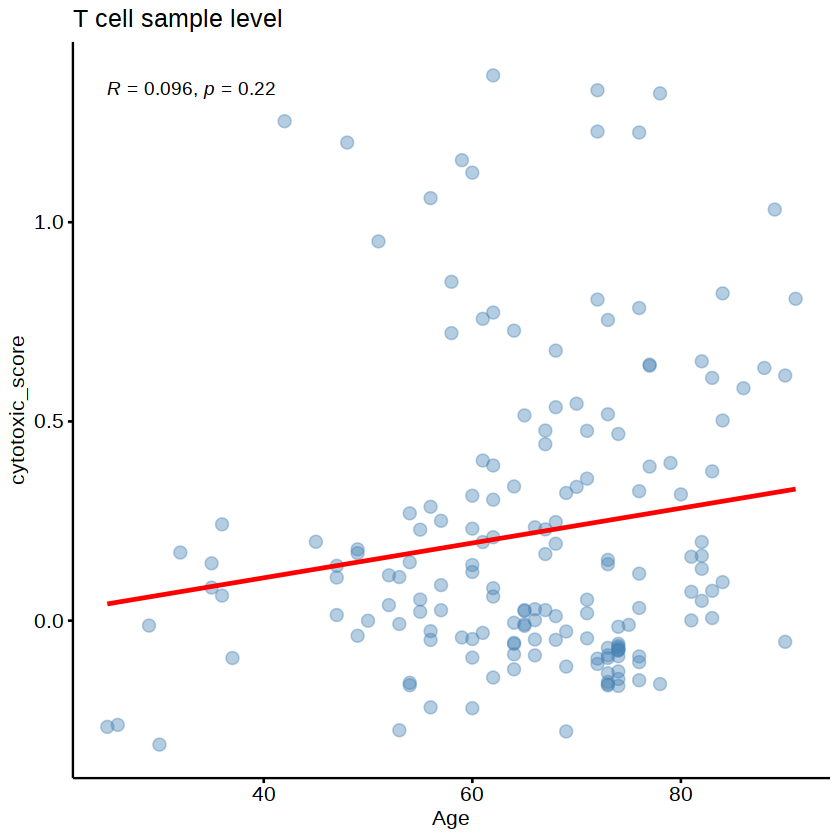

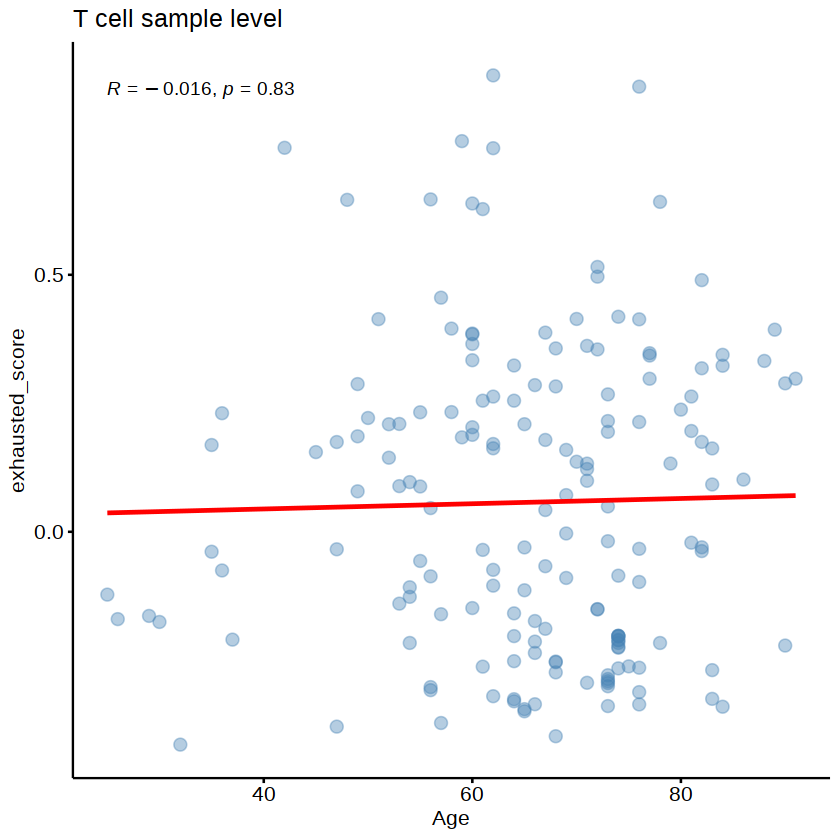

In [163]:
ggscatter(stat_samplelevel, x = "age", y = "cytotoxic_score",  color = "steelblue", #shape = 21, 
          size = 3,alpha = 0.4,
          add = "reg.line", conf.int = F, add.params = list(color = "red"),
          cor.coef = T, cor.method = "spearman",
          xlab = "Age", ylab = "cytotoxic_score")+
  ggtitle("T cell sample level")

ggscatter(stat_samplelevel, x = "age", y = "exhausted_score",  color = "steelblue", #shape = 21, 
          size = 3,alpha = 0.4,
          add = "reg.line", conf.int = F, add.params = list(color = "red"),
          cor.coef = T, cor.method = "spearman",
          xlab = "Age", ylab = "exhausted_score")+
  ggtitle("T cell sample level")

In [171]:
themeDivClust3 <-
  list(
    geom_boxplot(color = 'black',  width = 0.3, size = 0.3, fill = NA,outlier.shape = NA),
    geom_violin(color = 'black', scale = 'width',  linewidth = 0.5,trim = TRUE,alpha = 0.8),
    geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.07, size = 1, lwd = 0.05),
    #stat_compare_means(aes(group = response_bin),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1),
    #geom_violin(color = "black", draw_quantiles = 0.5, lwd = 0.5),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 1, lwd = 0.05),
    xlab(""),
    #scale_fill_muted(),
    #scale_color_muted(), 
    
    #scale_fill_manual(values = c("#E69F00","#56B4E9")),
    scale_fill_manual(values = rev(c("#E69F00","#56B4E9","#009E73","#F0E442","#0072B2","#D55E00"))),
    theme_minimal(),
    theme(legend.position = "none",
          #legend.justification = c(0,1),
          #legend.title = element_blank(),
          legend.text = element_text(size=8),
          legend.title = element_text(size=8),
          aspect.ratio = 1.2,
          #plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
          axis.title.y = element_text(size=8,colour="black"),
          axis.title.x = element_text(size=8,colour="black"),
          #axis.title.x = element_blank(),
          axis.text = element_text(size=8,colour="black",angle=0),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
          #axis.text.x = element_blank(),
          plot.title = element_text(size=8,face="bold",hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          axis.line = element_line(colour = "black"),
          axis.ticks.length=unit(.1, "cm"),
          axis.ticks = element_line(colour = "black", size = 0.5)
    )
  )
gg1= stat_samplelevel  %>%  filter(study== 'nsclc_inhouse_kim_etal') %>%
  ggplot(aes(x = age_group, y = exhausted_score, fill = age_group) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust3+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)
gg2= stat_samplelevel  %>% filter(study== 'nsclc_inhouse_kim_etal') %>%
  ggplot(aes(x = age_group, y = cytotoxic_score, fill = age_group) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust3+
  stat_compare_means(aes(group = age_group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)
pdf('Tcell_sample_level_signature.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1, gg2,ncol = 2)
dev.off()

Warning message:
"Duplicated aesthetics after name standardisation: size"


png 
  2

In [172]:
head(meta)

,X,celltype,cytotoxic_score,exhausted_score,age,Sample,study,age_bin4,age_bin2,age_bin3,age_bin5
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<fct>,<chr>,<fct>,<fct>
1,AAACCTGAGATATGCA_LUNG_T25,C3-CD4-CXCR6,-0.3608342,-0.2154291,69,LUNG_T25,nsclc_inhouse_kim_etal,60-80,>60,>60,60-70
2,AAACCTGAGGATCGCA_LUNG_T28,C11-CD8-LAYN,1.5525668,0.3933895,73,LUNG_T28,nsclc_inhouse_kim_etal,60-80,>60,>60,70-80
3,AAACCTGAGGATGGAA_LUNG_T31,C8-CD8-GZMK,0.6819429,0.2088584,65,LUNG_T31,nsclc_inhouse_kim_etal,60-80,>60,>60,60-70
4,AAACCTGAGGCAAAGA_LUNG_T06,C15-CD4/CD8-ISG15,0.5962756,-0.2379256,54,LUNG_T06,nsclc_inhouse_kim_etal,40-60,<=60,40-60,50-60
5,AAACCTGAGGCGACAT_LUNG_T18,C8-CD8-GZMK,0.9907712,-0.1917627,62,LUNG_T18,nsclc_inhouse_kim_etal,60-80,>60,>60,60-70
6,AAACCTGAGTCATCCA_LUNG_T08,C11-CD8-LAYN,0.2476995,-0.1179803,60,LUNG_T08,nsclc_inhouse_kim_etal,40-60,<=60,40-60,50-60


In [58]:
unique(meta$study)

[1] "nsclc_inhouse_kim_etal" "nsclc_leader_etal"      "CRC_GSE178341"         
[4] "HCC_GSE140228"          "GC_GSE183904"

In [61]:
table(meta$study)


         CRC_GSE178341           GC_GSE183904          HCC_GSE140228 
                    62                     26                     10 
nsclc_inhouse_kim_etal      nsclc_leader_etal 
                    19                     52 

In [60]:
library(ggridges)
ga= ggplot(data = meta %>% mutate(study=  
                                  factor(study, levels= rev(c('nsclc_inhouse_kim_etal',
                                                          'nsclc_leader_etal','CRC_GSE178341',
                                                          'GC_GSE183904','HCC_GSE140228'))
                                        )) ,
             aes(x = age, y = study, fill = study)) +
  geom_density_ridges(alpha = 0.8,
                      color = 'white',
                      rel_min_height = 0.01, #尾部修剪，数值越大修剪程度越高
                      scale = 200, #山脊重叠程度调整，scale = 1时刚好触及基线，数值越大重叠度越高
                      quantile_lines = TRUE, #显示分位数线
                      quantiles = 2 #仅显示中位数线
  ) +
  facet_wrap(.~study,scales = "free",ncol=1)+
  theme_classic() +
  theme(legend.position = 'none')+
  #scale_x_continuous(limits = c(4, 8),breaks = seq(4, 8, by = 2))+ #x轴限制
  geom_vline(xintercept = c(min(meta$age), max(meta$age)),
             size = 0.5,
             color = 'grey',
             lty = 'dashed')+
  scale_fill_manual(values = c("#E69F00","#56B4E9","#009E73","#F0E442","#0072B2"))
pdf('age_distribution.pdf',width = 5,height = 25)
cowplot::plot_grid(ga,ncol = 1)
dev.off()

Picking joint bandwidth of 6.89

Picking joint bandwidth of 4.73

Picking joint bandwidth of 5.4

Picking joint bandwidth of 2.51

Picking joint bandwidth of 6.71



png 
  2

In [67]:
ga2=ggplot(meta %>% mutate(study=  
                                  factor(study, levels= rev(c('nsclc_inhouse_kim_etal',
                                                          'nsclc_leader_etal','CRC_GSE178341',
                                                          'GC_GSE183904','HCC_GSE140228'))
                                        )), 
           aes(age, y = study,
               fill = 0.5 - abs(0.5 - stat(ecdf)))) +
  stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE,
                      scale = 200, #山脊重叠程度调整，scale = 1时刚好触及基线，数值越大重叠度越高
                      quantile_lines = TRUE, #显示分位数线
                      quantiles = 2) +
  scale_fill_gradient(low = "white", high = "#E69F00",
                      name = "Tail prob.") +
facet_wrap(.~study,scales = "free",ncol=1)+
  theme_classic() +
  theme(legend.position = "right",
        #legend.justification = c(0,1),
        #legend.title = element_blank(),
        legend.text = element_text(size=8),
        legend.title = element_text(size=8),
        aspect.ratio = 1.5,
        plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
        axis.title.y = element_text(size=8,colour="black"),
        axis.title.x = element_text(size=8,colour="black"),
        #axis.title.x = element_blank(),
        axis.text = element_text(size=8,colour="black",angle=0),
        axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
        #axis.text.x = element_blank(),
        plot.title = element_text(size=8,face="bold",hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(colour = "black", fill=NA, size=0.5),
        axis.line = element_line(colour = "black"),
        axis.ticks.length=unit(.1, "cm"),
        axis.ticks = element_line(colour = "black", size = 0.5)
  )

pdf('age_distribution2.pdf',width = 5,height = 25)
cowplot::plot_grid(ga2,ncol = 1)
dev.off()

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Picking joint bandwidth of 6.89

Picking joint bandwidth of 4.73

Picking joint bandwidth of 5.4

Picking joint bandwidth of 2.51

Picking joint bandwidth of 6.71



png 
  2

In [84]:
studylist= table(meta$study) %>% names
collist= c("#E69F00","#56B4E9","#009E73","#F0E442","#0072B2")
samplenum= table(meta$study) %>% as.numeric
glist=list()
for(i in 1:5){
    glist[[i]]=ggplot(meta %>%  filter(study== studylist[i]), 
           aes(age, y = study,
               fill = 0.5 - abs(0.5 - stat(ecdf)))) +
  stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE,
                      scale = 200, #山脊重叠程度调整，scale = 1时刚好触及基线，数值越大重叠度越高
                      quantile_lines = TRUE, #显示分位数线
                      quantiles = 2) +
    ggtitle(paste0(studylist[i],': # sample: ',samplenum[i]))+
  scale_fill_gradient(low = "white", high = collist[i],
                      name = "Tail prob.") +
  #facet_wrap(.~study,scales = "free",ncol=1)+
  theme_classic() +
  theme(legend.position = "right",
        #legend.justification = c(0,1),
        #legend.title = element_blank(),
        legend.text = element_text(size=8),
        legend.title = element_text(size=8),
        aspect.ratio = 1.5,
        plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
        axis.title.y = element_text(size=8,colour="black"),
        axis.title.x = element_text(size=8,colour="black"),
        #axis.title.x = element_blank(),
        axis.text = element_text(size=8,colour="black",angle=0),
        axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
        #axis.text.x = element_blank(),
        plot.title = element_text(size=8,face="bold",hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(colour = "black", fill=NA, size=0.5),
        axis.line = element_line(colour = "black"),
        axis.ticks.length=unit(.1, "cm"),
        axis.ticks = element_line(colour = "black", size = 0.5)
  )
    
}


In [85]:
pdf('age_distribution3.pdf',width = 5,height = 25)
cowplot::plot_grid(glist[[1]],glist[[2]],glist[[3]],glist[[4]],glist[[5]],ncol = 1)
dev.off()

Picking joint bandwidth of 5.4

Picking joint bandwidth of 4.73

Picking joint bandwidth of 6.89

Picking joint bandwidth of 6.71

Picking joint bandwidth of 2.51



png 
  2

In [80]:
table(meta$study) %>% as.numeric

[1] 62 26 10 19 52

In [68]:
unique(obs$celltype)

[1] "C3-CD4-CXCR6"      "C11-CD8-LAYN"      "C8-CD8-GZMK"      
 [4] "C15-CD4/CD8-ISG15" "C6-CD4-RORC"       "C10-CD8-ZNF683"   
 [7] "C1-CD4-CCR7"       "C9-CD8-CX3CR1"     "C4-CD4-CXCL13"    
[10] "C2-CD4-HSPA1A"     "C12-CD8-TRDV1"     "C13-NK-FCGR3A"    
[13] "C5-CD4-FOXP3"      "C7-CD8-SLC4A10"    "C14-NK-XCL1"      
[16] "C16-CD4/CD8-MKI67" "CD4T"              "CD8T"             
[19] "CD8-CXCL13"        "CD8-GZMK"          "CD4-FOXP3"        
[22] "CD8-GZMH"          "CD8-STMN1"         "CD8-ZNF683"       
[25] "CD4-CCR7"          "CD4-CXCL13"        "CD4-ANXA1"        
[28] "CD4-PRF1"          "CD8-ISG15"         "CD8-FTH1"         
[31] "CD8-CD52"          "CD8-FOS"

In [29]:
###------------
### median heatmap
###------------
library(ggplot2)

library(dplyr)
head(obs,n=2)
ht_data_cyto  =  obs %>% filter(grepl('CD', celltype)) %>% 
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
mutate(group= paste(study, age_group,sep='.')) %>%
select(c(cytotoxic_score,exhausted_score,group)) %>%
group_by(group) %>% summarise_all(median) %>% 
mutate(study= sapply(stringr::str_split(group, "[.]"), `[`, 1)) %>%
mutate(age_group= sapply(stringr::str_split(group, "[.]"), `[`, 2))

htlong <- ht_data_cyto %>% tidyr::pivot_longer(cols=c('cytotoxic_score','exhausted_score'),
                                                                     names_to= "signature",
                                                                values_to = "score")
htlong$age_group= factor(htlong$age_group,  levels= c('<40', '40-60','60-80','>80'))
htlong %>% head(n=2)

,X,celltype,cytotoxic_score,exhausted_score,age,Sample,study,age_bin4,age_bin3,age_bin5,age_bin2
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>
1,AAACCTGAGATATGCA_LUNG_T25,C3-CD4-CXCR6,-0.3608342,-0.2154291,69,LUNG_T25,nsclc_inhouse_kim_etal,60-80,>60,60-70,>60
2,AAACCTGAGGATCGCA_LUNG_T28,C11-CD8-LAYN,1.5525668,0.3933895,73,LUNG_T28,nsclc_inhouse_kim_etal,60-80,>60,70-80,>60


group,study,age_group,signature,score
<chr>,<chr>,<fct>,<chr>,<dbl>
CRC_GSE178341.40-60,CRC_GSE178341,40-60,cytotoxic_score,0.4513135
CRC_GSE178341.40-60,CRC_GSE178341,40-60,exhausted_score,0.3604756


In [30]:
unique(htlong$age_group)

[1] 40-60 60-80 <40   >80  
Levels: <40 40-60 60-80 >80

In [48]:
ggd= htlong %>%
ggplot(aes(x = age_group, y = signature, 
           size = score,
           #fill=  score,
           color = score)) +
    geom_point() +
    facet_wrap(.~study,scales = "free",ncol = 1)+
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text = element_text(color = "black"),
          axis.text.x = element_text(angle = 45, hjust = 1)) +

scale_color_gradientn(colours = rainbow(10))

#scale_fill_distiller(palette = "Lajolla") +
#scale_color_distiller(palette = "Lajolla")

pdf('_dot_signature_median.pdf',width = 4,height = 6)
cowplot::plot_grid(ggd,ncol = 1)
dev.off()

png 
  2

In [69]:
###----------
### for CD4 T
###----------
ht_data_cyto  =  obs %>% filter(grepl('CD4', celltype)) %>% 
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
mutate(group= paste(study, age_group,sep='.')) %>%
select(c(cytotoxic_score,exhausted_score,group)) %>%
group_by(group) %>% summarise_all(median) %>% 
mutate(study= sapply(stringr::str_split(group, "[.]"), `[`, 1)) %>%
mutate(age_group= sapply(stringr::str_split(group, "[.]"), `[`, 2))

htlong <- ht_data_cyto %>% tidyr::pivot_longer(cols=c('cytotoxic_score','exhausted_score'),
                                                                     names_to= "signature",
                                                                values_to = "score")
htlong$age_group= factor(htlong$age_group,  levels= c('<40', '40-60','60-80','>80'))
htlong %>% head(n=2)

ggd= htlong %>%
ggplot(aes(x = age_group, y = signature, 
           size = score,
           #fill=  score,
           color = score)) +
    geom_point() +
    facet_wrap(.~study,scales = "free",ncol = 1)+
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text = element_text(color = "black"),
          axis.text.x = element_text(angle = 45, hjust = 1)) +

scale_color_gradientn(colours = rainbow(10))

#scale_fill_distiller(palette = "Lajolla") +
#scale_color_distiller(palette = "Lajolla")

pdf('_dot_signature_median_CD4Tonly.pdf',width = 4,height = 6)
cowplot::plot_grid(ggd,ncol = 1)
dev.off()

group,study,age_group,signature,score
<chr>,<chr>,<fct>,<chr>,<dbl>
CRC_GSE178341.40-60,CRC_GSE178341,40-60,cytotoxic_score,0.06800693
CRC_GSE178341.40-60,CRC_GSE178341,40-60,exhausted_score,0.26882644


png 
  2

In [70]:
###----------
### for CD8 T
###----------
ht_data_cyto  =  obs %>% filter(grepl('CD8', celltype)) %>% 
mutate(age_group= cut(age,  breaks = c(min(age),40,60,80,max(age)),
                                     labels = c("<40","40-60",'60-80',">80"), include.lowest = TRUE)) %>%
mutate(group= paste(study, age_group,sep='.')) %>%
select(c(cytotoxic_score,exhausted_score,group)) %>%
group_by(group) %>% summarise_all(median) %>% 
mutate(study= sapply(stringr::str_split(group, "[.]"), `[`, 1)) %>%
mutate(age_group= sapply(stringr::str_split(group, "[.]"), `[`, 2))

htlong <- ht_data_cyto %>% tidyr::pivot_longer(cols=c('cytotoxic_score','exhausted_score'),
                                                                     names_to= "signature",
                                                                values_to = "score")
htlong$age_group= factor(htlong$age_group,  levels= c('<40', '40-60','60-80','>80'))
htlong %>% head(n=2)

ggd= htlong %>%
ggplot(aes(x = age_group, y = signature, 
           size = score,
           #fill=  score,
           color = score)) +
    geom_point() +
    facet_wrap(.~study,scales = "free",ncol = 1)+
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text = element_text(color = "black"),
          axis.text.x = element_text(angle = 45, hjust = 1)) +

scale_color_gradientn(colours = rainbow(10))

#scale_fill_distiller(palette = "Lajolla") +
#scale_color_distiller(palette = "Lajolla")

pdf('_dot_signature_median_CD8Tonly.pdf',width = 4,height = 6)
cowplot::plot_grid(ggd,ncol = 1)
dev.off()

group,study,age_group,signature,score
<chr>,<chr>,<fct>,<chr>,<dbl>
CRC_GSE178341.40-60,CRC_GSE178341,40-60,cytotoxic_score,1.3925031
CRC_GSE178341.40-60,CRC_GSE178341,40-60,exhausted_score,0.5624433


png 
  2

In [71]:
unique(htlong$study)

[1] "CRC_GSE178341"          "GC_GSE183904"           "HCC_GSE140228"         
[4] "nsclc_inhouse_kim_etal" "nsclc_leader_etal"

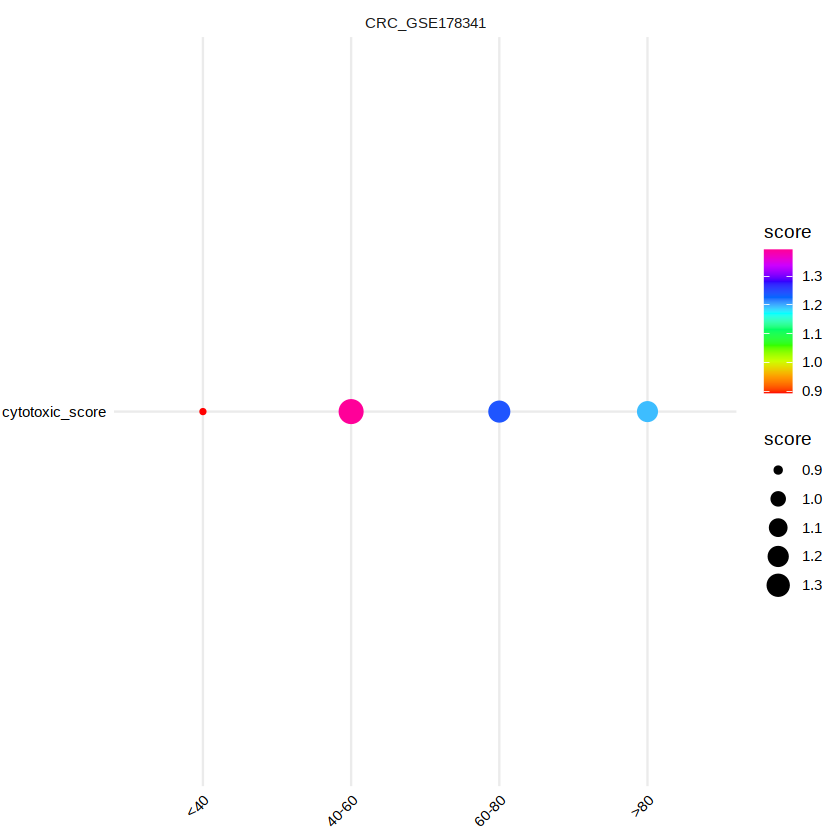

In [74]:
htlong %>% filter(study== 'CRC_GSE178341') %>% 
filter(signature== 'cytotoxic_score') %>%
ggplot(aes(x = age_group, y = signature, 
           size = score,
           #fill=  score,
           color = score)) +
    geom_point() +
    facet_wrap(.~study,scales = "free",ncol = 1)+
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text = element_text(color = "black"),
          axis.text.x = element_text(angle = 45, hjust = 1)) +

scale_color_gradientn(colours = rainbow(10))

##------------------------------------------------------
## signature of response data
##------------------------------------------------------

In [124]:
library(zellkonverter)
library(Seurat)
library(SingleCellExperiment)
sce2=readH5AD('/data/Zhuxq/pub_sc_data/ccRCC_Krishna_etal_CancerCell_2021/out/Totaldata//adata_tumourTissue.h5ad') ## already singlecellexperiment

Note: Using stored X_name value 'counts'



In [125]:
##-- draw T cell signature
##
library(dplyr)
stat= colData(sce2) %>% as.data.frame

stat= stat[stat$cluster_name %in% c( 'CD8A+ Exhausted','CD8A+ Tissue-resident','CD8A+ Exhausted IEG',
                                                 'CD8A+ Proliferating','CD4+ Activated IEG','CD4+ Treg', 'CD8A+ NK-like',
                                                 'CD4+ Effector','CD4+ Proliferating','CD4+ Naive'
                                   ),]


stat$treatment= gsub(' ', '',stat$treatment)
stat= stat[stat$treatment %in% c('Ipi.Nivoresistant','Ipi.Nivomixedresponse','Ipi.Nivocompleteresponse'),]
stat$group = ifelse(stat$treatment== 'Ipi.Nivoresistant','nonResponse','Response')

#
stat= stat[stat$region %in% c('Center'),]
dim(stat)

[1] 10034    56

In [126]:
stat$group= factor(stat$group, levels=c('nonResponse','Response'))

In [107]:
library(ggpubr)
library(khroma)
library(ggpubr)
themeDivClust2 <-
  list(
    geom_boxplot(color = 'black',  width = 0.3, size = 0.3, fill = NA,outlier.shape = NA),
    geom_violin(color = 'black', scale = 'width',  linewidth = 0.5,trim = TRUE,alpha = 0.8),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.04, size = 0.5, lwd = 0.05),
    #stat_compare_means(aes(group = response_bin),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1),
    #geom_violin(color = "black", draw_quantiles = 0.5, lwd = 0.5),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 1, lwd = 0.05),
    xlab(""),
    #scale_fill_muted(),
    #scale_color_muted(), 
    
    scale_fill_manual(values = c("#E69F00","#56B4E9")),
    #scale_fill_manual(values = rev(c("#E69F00","#56B4E9","#009E73",'#EEDD88'))),
    theme_minimal(),
    theme(legend.position = "none",
          #legend.justification = c(0,1),
          #legend.title = element_blank(),
          legend.text = element_text(size=8),
          legend.title = element_text(size=8),
          aspect.ratio = 1.2,
          #plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
          axis.title.y = element_text(size=8,colour="black"),
          axis.title.x = element_text(size=8,colour="black"),
          #axis.title.x = element_blank(),
          axis.text = element_text(size=8,colour="black",angle=0),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
          #axis.text.x = element_blank(),
          plot.title = element_text(size=8,face="bold",hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          axis.line = element_line(colour = "black"),
          axis.ticks.length=unit(.1, "cm"),
          axis.ticks = element_line(colour = "black", size = 0.5)
    )
  )
###-----
### for ccRCC
###-----
gg1= stat  %>% 
ggplot(aes(x = group, y = cytotoxic_score..T.cell., fill = group) ) +
  ylab("cytotoxic_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('ccRCC')
  
#
gg2= stat  %>% 
  ggplot(aes(x = group, y = exhausted_score..T.cell., fill = group) ) +
  ylab("exhausted_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('ccRCC')
#
pdf('boxplot_pan_signature_ccRCC_response.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1,gg2, ncol=2)
dev.off()

png 
  2

In [127]:
###----------
### median dot plot
###----------
ht_data_cyto  =  stat %>% 
select(c(cytotoxic_score..T.cell.,exhausted_score..T.cell.,group)) %>%
group_by(group) %>% summarise_all(median) %>% 
setNames(c('group', 'cytotoxic_score','exhausted_score'))

htlong <- ht_data_cyto %>% tidyr::pivot_longer(cols=c('cytotoxic_score','exhausted_score'),
                                                                     names_to= "signature",
                                                                values_to = "score")
htlong$group= factor(htlong$group, levels=c('nonResponse','Response'))
htlong %>% head(n=2)


group,signature,score
<fct>,<chr>,<dbl>
nonResponse,cytotoxic_score,0.64937010
nonResponse,exhausted_score,-0.05223826


In [128]:
ggd= htlong %>%
ggplot(aes(x = group, y = signature, 
           size = score,
           #fill=  score,
           color = score)) +
    geom_point() +
    #facet_wrap(.~study,scales = "free",ncol = 1)+
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text = element_text(color = "black"),
          axis.text.x = element_text(angle = 45, hjust = 1)) +

scale_color_gradientn(colours = rainbow(10))

#scale_fill_distiller(palette = "Lajolla") +
#scale_color_distiller(palette = "Lajolla")

pdf('_dot_signature_median_response_group_ccRCC.pdf',width = 4,height = 4)
cowplot::plot_grid(ggd,ncol = 1)
dev.off()

png 
  2

In [108]:
##----
## BCC
##----
library(zellkonverter)
library(Seurat)
library(SingleCellExperiment)
sce=readH5AD('/data/Zhuxq/pub_sc_data/melanoma_Yost_etal_GSE123813_NM_2019/out/Totaldata/adataall_bcc_signatured.h5ad') ## already singlecellexperiment
sce

Note: Using stored X_name value 'counts'



class: SingleCellExperiment 
dim: 23309 53030 
metadata(8): cluster_colors hvg ... pca umap
assays(2): counts logcounts
rownames(23309): FO538757.2 AP006222.2 ... XXbac-B135H6.18 GGTLC2
rowData names(13): mt ribo ... std varm
colnames(53030): bcc.su001.pre.tcell_AAACCTGCAGATCGGA
  bcc.su001.pre.tcell_AAACCTGCAGGGATTG ...
  bcc.su012.post.tcell_TTTGTCAAGTGAACGC
  bcc.su012.post.tcell_TTTGTCAGTCCCTTGT
colData names(34): orig.ident nCount_RNA ...
  KEGG_ETHER_LIPID_METABOLISM (endos) HALLMARK_FATTY_ACID_METABOLISM
  (endos)
reducedDimNames(3): X_pca X_pca_harmonized X_umap
altExpNames(0):

In [109]:
library(dplyr)
stat= colData(sce) %>% as.data.frame
colnames(stat)= gsub(' ', '', colnames(stat))
colnames(stat)= gsub('[(]', '', colnames(stat))
colnames(stat)= gsub('[)]', '', colnames(stat))
colnames(stat)

stat= stat[stat$cluster %in% c('CD8_mem_T_cells','CD4_T_cells','Tregs','CD8_act_T_cells','CD8_ex_T_cells',
                                            #'NK_cells',
                                            'Tcell_prolif'),
          ]
stat=stat[stat$treatment %in% c('pre'),]
stat$group= ifelse(stat$Response=='Yes','Response','nonResponse')

[1] "orig.ident"                                     
 [2] "nCount_RNA"                                     
 [3] "nFeature_RNA"                                   
 [4] "patient"                                        
 [5] "treatment"                                      
 [6] "sort"                                           
 [7] "cluster"                                        
 [8] "UMAP1"                                          
 [9] "UMAP2"                                          
[10] "Response"                                       
[11] "ident"                                          
[12] "n_genes_by_counts"                              
[13] "total_counts"                                   
[14] "total_counts_mt"                                
[15] "pct_counts_mt"                                  
[16] "total_counts_ribo"                              
[17] "pct_counts_ribo"                                
[18] "louvain"                                        
[19] "cytotoxic_score..T.cell."                       
[20] "exhausted_score..T.cell."                       
[21] "ActivatedDC"                                    
[22] "MigratoryDC"                                    
[23] "M1"                                             
[24] "M2"                                             
[25] "Angiogenesis..Mac."                             
[26] "Phagocytosis..Mac."                             
[27] "HALLMARK_INFLAMMATORY_RESPONSE..Fibs.endo."     
[28] "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION..Fibs."
[29] "KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION.Fibs."  
[30] "HALLMARK_ANGIOGENESIS.Fibs.endos."              
[31] "REACTOME_COLLAGEN_FORMATION.Fibs.endos."        
[32] "HEMOSTASIS..endos."                             
[33] "KEGG_ETHER_LIPID_METABOLISM..endos."            
[34] "HALLMARK_FATTY_ACID_METABOLISM..endos."

In [110]:
stat$group= factor(stat$group, levels=c('nonResponse','Response'))

In [111]:
themeDivClust2 <-
  list(
    geom_boxplot(color = 'black',  width = 0.3, size = 0.3, fill = NA,outlier.shape = NA),
    geom_violin(color = 'black', scale = 'width',  linewidth = 0.5,trim = TRUE,alpha = 0.8),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.04, size = 0.5, lwd = 0.05),
    #stat_compare_means(aes(group = response_bin),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1),
    #geom_violin(color = "black", draw_quantiles = 0.5, lwd = 0.5),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 1, lwd = 0.05),
    xlab(""),
    #scale_fill_muted(),
    #scale_color_muted(), 
    
    scale_fill_manual(values = c("#E69F00","#56B4E9")),
    #scale_fill_manual(values = rev(c("#E69F00","#56B4E9","#009E73",'#EEDD88'))),
    theme_minimal(),
    theme(legend.position = "none",
          #legend.justification = c(0,1),
          #legend.title = element_blank(),
          legend.text = element_text(size=8),
          legend.title = element_text(size=8),
          aspect.ratio = 1.2,
          #plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
          axis.title.y = element_text(size=8,colour="black"),
          axis.title.x = element_text(size=8,colour="black"),
          #axis.title.x = element_blank(),
          axis.text = element_text(size=8,colour="black",angle=0),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
          #axis.text.x = element_blank(),
          plot.title = element_text(size=8,face="bold",hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          axis.line = element_line(colour = "black"),
          axis.ticks.length=unit(.1, "cm"),
          axis.ticks = element_line(colour = "black", size = 0.5)
    )
  )

gg1= stat  %>% 
ggplot(aes(x = group, y = cytotoxic_score..T.cell., fill = group) ) +
  ylab("cytotoxic_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('BCC')
  
#
gg2= stat  %>% 
  ggplot(aes(x = group, y = exhausted_score..T.cell., fill = group) ) +
  ylab("exhausted_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = group),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('BCC')
#
pdf('boxplot_pan_signature_BCC_response.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1,gg2, ncol=2)
dev.off()

png 
  2

In [118]:
###----------
### median dot plot
###----------
ht_data_cyto  =  stat %>% 
select(c(cytotoxic_score..T.cell.,exhausted_score..T.cell.,group)) %>%
group_by(group) %>% summarise_all(median) %>% 
setNames(c('group', 'cytotoxic_score','exhausted_score'))

htlong <- ht_data_cyto %>% tidyr::pivot_longer(cols=c('cytotoxic_score','exhausted_score'),
                                                                     names_to= "signature",
                                                                values_to = "score")
htlong$group= factor(htlong$group, levels=c('nonResponse','Response'))
htlong %>% head(n=2)


group,signature,score
<fct>,<chr>,<dbl>
nonResponse,cytotoxic_score,-0.10486028
nonResponse,exhausted_score,-0.06708952


In [123]:
ggd= htlong %>%
ggplot(aes(x = group, y = signature, 
           size = score,
           #fill=  score,
           color = score)) +
    geom_point() +
    #facet_wrap(.~study,scales = "free",ncol = 1)+
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text = element_text(color = "black"),
          axis.text.x = element_text(angle = 45, hjust = 1)) +

scale_color_gradientn(colours = rainbow(10))

#scale_fill_distiller(palette = "Lajolla") +
#scale_color_distiller(palette = "Lajolla")

pdf('_dot_signature_median_response_group_BCC.pdf',width = 4,height = 4)
cowplot::plot_grid(ggd,ncol = 1)
dev.off()

png 
  2

In [ ]:
###
###
###
###

In [1]:
obs= read.csv('scanpy_out/adata.obs.pooledCalculated.signature.csv',header=T)

In [2]:
summary(obs$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   61.00   68.00   66.72   74.00   91.00 

In [31]:
obs$age_bin4<- cut(obs$Age,  breaks = c(min(obs$Age),40,60,80,max(obs$Age)),
                                     labels = c("<40","40-60","60-80",">80"), include.lowest = TRUE)
obs$age_bin3<- cut(obs$Age,  breaks = c(min(obs$Age),40,60,max(obs$Age)),
                                     labels = c("<40","40-60",">60"), include.lowest = TRUE)
obs$age_bin5<- cut(obs$Age,  breaks = c(min(obs$Age),40,50,60,70,80,max(obs$Age)),
                                     labels = c("<40","40-50",'50-60',"60-70",'70-80','>80'), include.lowest = TRUE)

obs$age_bin2=  ifelse(obs$Age > 60, '>60','<=60')


obs$age_bin8<- cut(obs$Age,  breaks = c(min(obs$Age),60,80,max(obs$Age)),
                                     labels = c("<60","60-80",'>80'), include.lowest = TRUE)



In [23]:
library(ggpubr)
library(khroma)
library(ggpubr)
themeDivClust2 <-
  list(
    geom_boxplot(color = 'black',  width = 0.3, size = 0.3, fill = NA,outlier.shape = NA),
    geom_violin(color = 'black', scale = 'width',  linewidth = 0.5,trim = TRUE,alpha = 0.8),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 2, lwd = 0.05),
    #stat_compare_means(aes(group = response_bin),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1),
    #geom_violin(color = "black", draw_quantiles = 0.5, lwd = 0.5),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 1, lwd = 0.05),
    xlab(""),
    #scale_fill_muted(),
    #scale_color_muted(), 
    
    #scale_fill_manual(values = c("#E69F00","#56B4E9")),
    scale_fill_manual(values = rev(c('#EF6F6A','#8CC2CA',"#E69F00","#56B4E9","#009E73",'#EEDD88'))),
    theme_minimal(),
    theme(legend.position = "none",
          #legend.justification = c(0,1),
          #legend.title = element_blank(),
          legend.text = element_text(size=8),
          legend.title = element_text(size=8),
          aspect.ratio = 1.2,
          #plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
          axis.title.y = element_text(size=8,colour="black"),
          axis.title.x = element_text(size=8,colour="black"),
          #axis.title.x = element_blank(),
          axis.text = element_text(size=8,colour="black",angle=0),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
          #axis.text.x = element_blank(),
          plot.title = element_text(size=8,face="bold",hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          axis.line = element_line(colour = "black"),
          axis.ticks.length=unit(.1, "cm"),
          axis.ticks = element_line(colour = "black", size = 0.5)
    )
  )
###-----
### 
###-----
gg1_nsclc1= obs  %>%
ggplot(aes(x = age_bin2, y = exhausted_score, fill = age_bin2) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin2),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')
  
#
gg2_nsclc1= obs %>%
  ggplot(aes(x = age_bin2, y = cytotoxic_score, fill = age_bin2) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin2),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')
#
pdf('boxplot_pan_signature_mergeCalculated_bin2.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [24]:
gg1_nsclc1= obs  %>%
ggplot(aes(x = age_bin3, y = exhausted_score, fill = age_bin3) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin3),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')
  
#
gg2_nsclc1= obs %>%
  ggplot(aes(x = age_bin3, y = cytotoxic_score, fill = age_bin3) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin3),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')
#
pdf('boxplot_pan_signature_mergeCalculated_bin3.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [25]:
meanvalue <- obs %>% #dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin4) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>%
ggplot(aes(x = age_bin4, y = exhausted_score, fill = age_bin4) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin4),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin4, y = median, group=1),color="red")

  
#
meanvalue <- obs %>% #dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin4) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>%
  ggplot(aes(x = age_bin4, y = cytotoxic_score, fill = age_bin4) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin4),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin4, y = median, group=1),color="red")

#
pdf('boxplot_pan_signature_mergeCalculated_bin4.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [26]:
gg1_nsclc1= obs  %>%
ggplot(aes(x = age_bin5, y = exhausted_score, fill = age_bin5) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin5),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')
  
#
gg2_nsclc1= obs %>%
  ggplot(aes(x = age_bin5, y = cytotoxic_score, fill = age_bin5) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin5),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')
#
pdf('boxplot_pan_signature_mergeCalculated_bin5.pdf',width = 8,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [27]:
meanvalue <- obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin4) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>% dplyr::filter(grepl('CD4', celltype)) %>% 
ggplot(aes(x = age_bin4, y = exhausted_score, fill = age_bin4) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin4),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD4')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin4, y = median, group=1),color="red")


  
#
meanvalue <- obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin4) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  ggplot(aes(x = age_bin4, y = cytotoxic_score, fill = age_bin4) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin4),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD4')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin4, y = median, group=1),color="red")

#
pdf('boxplot_pan_signature_mergeCalculated_bin4_CD4.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [28]:
meanvalue <- obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  group_by(age_bin4) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>% dplyr::filter(grepl('CD8', celltype)) %>% 
ggplot(aes(x = age_bin4, y = exhausted_score, fill = age_bin4) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin4),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD8')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin4, y = median, group=1),color="red")

  
#
meanvalue <- obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  group_by(age_bin4) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  ggplot(aes(x = age_bin4, y = cytotoxic_score, fill = age_bin4) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin4),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD8')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin4, y = median, group=1),color="red")

#
pdf('boxplot_pan_signature_mergeCalculated_bin4_CD8.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [29]:
gg1_nsclc1= obs  %>% dplyr::filter(grepl('CD8', celltype)) %>% 
ggplot(aes(x = age_bin2, y = exhausted_score, fill = age_bin2) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin2),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD8')
  
#
gg2_nsclc1= obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  ggplot(aes(x = age_bin2, y = cytotoxic_score, fill = age_bin2) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin2),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD8')
#
pdf('boxplot_pan_signature_mergeCalculated_bin2_CD8.pdf',width = 6,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()


png 
  2

In [30]:
gg1_nsclc1= obs  %>% dplyr::filter(grepl('CD4', celltype)) %>% 
ggplot(aes(x = age_bin2, y = exhausted_score, fill = age_bin2) ) +
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin2),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD4')
  
#
gg2_nsclc1= obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  ggplot(aes(x = age_bin2, y = cytotoxic_score, fill = age_bin2) ) +
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin2),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD4')
#
pdf('boxplot_pan_signature_mergeCalculated_bin2_CD4.pdf',width = 6,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [41]:
meanvalue <- obs %>% #dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>%
ggplot(aes(x = age_bin8, y = exhausted_score, fill = age_bin8) ) +
 geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+

  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")

  
#
meanvalue <- obs %>% #dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>%
  ggplot(aes(x = age_bin8, y = cytotoxic_score, fill = age_bin8) ) +
geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")

#
pdf('boxplot_pan_signature_mergeCalculated_bin8.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [38]:
meanvalue <- obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>% dplyr::filter(grepl('CD4', celltype)) %>% 
ggplot(aes(x = age_bin8, y = exhausted_score, fill = age_bin8) ) +
geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD4')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")

  
#
meanvalue <- obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>% dplyr::filter(grepl('CD4', celltype)) %>% 
  ggplot(aes(x = age_bin8, y = cytotoxic_score, fill = age_bin8) ) +
geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD4')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")

#
pdf('boxplot_pan_signature_mergeCalculated_bin8_CD4.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [39]:
meanvalue <- obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>% dplyr::filter(grepl('CD8', celltype)) %>% 
ggplot(aes(x = age_bin8, y = exhausted_score, fill = age_bin8) ) +
geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+
  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD8')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")

  
#
meanvalue <- obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>% dplyr::filter(grepl('CD8', celltype)) %>% 
  ggplot(aes(x = age_bin8, y = cytotoxic_score, fill = age_bin8) ) +
geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool CD8')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")

#
pdf('boxplot_pan_signature_mergeCalculated_bin8_CD8.pdf',width = 4,height = 5)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2

In [51]:
themeDivClust2 <-
  list(
    geom_boxplot(color = 'black',  width = 0.3, size = 0.3, fill = NA,outlier.shape = NA),
    geom_violin(color = 'black', scale = 'width',  linewidth = 0.5,trim = TRUE,alpha = 0.8),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 2, lwd = 0.05),
    #stat_compare_means(aes(group = response_bin),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1),
    #geom_violin(color = "black", draw_quantiles = 0.5, lwd = 0.5),
    #geom_jitter(shape = 21, color = "gray", fill = "white", width = 0.1, size = 1, lwd = 0.05),
    xlab(""),
    #scale_fill_muted(),
    #scale_color_muted(), 
    
    #scale_fill_manual(values = c("#E69F00","#56B4E9")),
    scale_fill_manual(values = rev(c('#EF6F6A','#8CC2CA',"#E69F00","#56B4E9","#009E73",'#EEDD88'))),
    theme_minimal(),
    theme(legend.position = "none",
          #legend.justification = c(0,1),
          #legend.title = element_blank(),
          legend.text = element_text(size=8),
          legend.title = element_text(size=8),
          aspect.ratio = 0.5,
          #plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
          axis.title.y = element_text(size=8,colour="black"),
          axis.title.x = element_text(size=8,colour="black"),
          #axis.title.x = element_blank(),
          axis.text = element_text(size=8,colour="black",angle=0),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1),
          #axis.text.x = element_blank(),
          plot.title = element_text(size=8,face="bold",hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          axis.line = element_line(colour = "black"),
          axis.ticks.length=unit(.1, "cm"),
          axis.ticks = element_line(colour = "black", size = 0.5)
    )
  )






meanvalue <- obs %>% #dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(exhausted_score)) %>%
  ungroup()

gg1_nsclc1= obs  %>%
ggplot(aes(x = age_bin8, y = exhausted_score, fill = age_bin8) ) +
 geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+

  ylab("exhausted_score") +
  #facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")+
coord_flip()

  
#
meanvalue <- obs %>% #dplyr::filter(grepl('CD4', celltype)) %>% 
  group_by(age_bin8) %>% 
  summarize(median = median(cytotoxic_score)) %>%
  ungroup()

gg2_nsclc1= obs %>%
  ggplot(aes(x = age_bin8, y = cytotoxic_score, fill = age_bin8) ) +
geom_point(data = meanvalue, 
             mapping = aes(x = age_bin8, y = median),
             color="red")+
  ylab("cytotoxic_score") +
#facet_wrap(.~study,scales = "free",nrow = 1)+
  themeDivClust2+
  stat_compare_means(aes(group = age_bin8),label.x.npc = c("middle"),
                     label.y.npc=c("top"), label = "p.signif",vjust = 1)+
ggtitle('pan-cancer pool')+
geom_line(data = meanvalue, 
            mapping = aes(x = age_bin8, y = median, group=1),color="red")+
coord_flip()

#
pdf('boxplot_pan_signature_mergeCalculated_bin8_thin_h.pdf',width = 8,height = 3)
cowplot::plot_grid(gg1_nsclc1,gg2_nsclc1, ncol=2)
dev.off()

png 
  2